<a href="https://colab.research.google.com/github/hyunjung930/Python/blob/hyunjung/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%88%98%ED%95%99%EC%A4%91%EC%8B%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#통계
평균, 중간값,사분위값,최빈값,분산,표준편차

In [1]:
import numpy as np
heights = np.random.normal(161.4,7,200) #정규분포를 갖는 랜덤한 데이터를 발생(평균:161.1,표준편차:7, 개수:200)
bmi = np.random.normal(21,1,200) #체질량 지수
weights = bmi*(heights**2)/10000 #몸무게

In [3]:
print("----키----")
print("평균     :",heights.mean())
print("중간값     :",np.median(heights))
print("1/4분위     :",np.quantile(heights,0.25))
print("1/2분위     :",np.quantile(heights,0.5))
print("3/4분위     :",np.quantile(heights,0.75))
hist,_ = np.histogram(heights,bins=[x for x in range(0,250,5)]) #반환값: 히스토그램,bins
#bins:경계값
mi = hist.argmax() #최대값이 있는 인덱스
print("최빈구간     :",mi*5+2.5)

----키----
평균     : 161.16834130374616
중간값     : 161.30770209358568
1/4분위     : 155.558290923054
1/2분위     : 161.30770209358568
3/4분위     : 166.02742510539048
최빈구간     : 162.5


# 공분산
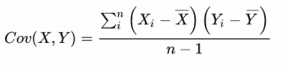

In [6]:
cv = np.cov(heights,weights)
print(cv)
print("공분산(키,키)         :",cv[0,0])
print("공분산(키,몸무게)     :",cv[0,1])
print("공분산(몸무게,키)     :",cv[1,0])
print("공분산(몸무게,몸무게) :",cv[1,1])

[[49.03345383 34.89996369]
 [34.89996369 32.9637543 ]]
공분산(키,키)         : 49.03345383273557
공분산(키,몸무게)     : 34.89996369447961
공분산(몸무게,키)     : 34.89996369447961
공분산(몸무게,몸무게) : 32.96375430361817


상관관계
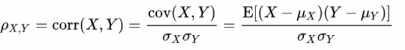

In [8]:
import pandas as pd
se_he = pd.Series(heights) #특별한 값 Serise
se_we = pd.Series(weights)
print(se_he.corr(se_we))

0.8680812949059666


In [9]:
def correlation(x,y): #출력속도가 더 빠름
  std_x = x.std()
  std_y = y.std()
  if std_x>0 and std_y >0:
    return np.cov(x,y)[0,1]/(std_x*std_y)
  return 0

In [10]:
def correlation(x,y):
  if x.std()>0 and y.std() >0:
    return np.cov(x,y)[0,1]/(x.std()*y.std())
  return 0

In [11]:
print(correlation(heights,weights))

0.8724435124683084


#확률

조건부 확률, 독립사건

P(a):a가 발생할 확률

P(b):b가 발생할 확률

P(a|b):b가 발생한 상태에서 a가 발생할 확률 - 조건부 사건

P(a|b):P(a)일 때 a와 b는 독립사건

In [13]:
pa = 0.5 #동전을 던져서 앞면이 나올 확률
pb = 1/6 #주사위를 던졌을 때 1 면이 나올 확률

print(f"P(a) = {pa:.2f}")
print(f"P(b) = {pb:.2f}")
print("P(a and b ) = P(a|b)*P(b)")
print("a와 b가 독립사건일 때")
pab = pa*pb
print(f"P(a and b ) = P(a|b)*P(b) = P(a)*P(b) = {pab:.2f}")

P(a) = 0.50
P(b) = 0.17
P(a and b ) = P(a|b)*P(b)
a와 b가 독립사건일 때
P(a and b ) = P(a|b)*P(b) = P(a)*P(b) = 0.08


In [14]:
import math
logit_pab = math.log(pa) + math.log(pb)
print("a와 b가 독립 사건일 때")
print(f"logit(P(a and b)) = log(P(a|b)) = log(P(a)) + log(P(b)) = {logit_pab:.2f}")
inv_logit_pab = math.exp(logit_pab)
print(f"inv(logit(P(a and b)) = exp(logit(P(a and b))) = P(a and b)) = {inv_logit_pab:.2f}")

a와 b가 독립 사건일 때
logit(P(a and b)) = log(P(a|b)) = log(P(a)) + log(P(b)) = -2.48
inv(logit(P(a and b)) = exp(logit(P(a and b))) = P(a and b)) = 0.08


#균등분포함수

주사위를 던졌을 때 1면, 2면, 3면, 4면, 5면, 6면이 나올 확률은 모두 1/6이다.

In [15]:
def uniform_pdf(x,min_v=0,max_v=1):
  if min_v <= x <= max_v: #발생할 범위 내에 있다면
    return 1/(max_v-min_v) #1/범위 가 확률이다.
  return 0

누적 균등 분포 함수

In [16]:
def uniform_cdf(x,min_v=0,max_v=1):
  if x<min_v:
    return 0
  if min_v<=x<=max_v: #발생할 범위 내에 있다면
    return (x-min_v)/(max_v-min_v) #누적범위/범위가 확률이다.
  return 1 #x가 max_v보다 크다면 누적값은 1

In [17]:
xs=[]
pys=[] #균등분포를 보관할 컬렉션
cys=[] #누적균등분포를 보관할 컬렉션

for x in range(-10,10):
  pys.append(uniform_pdf(x,0,6))
  cys.append(uniform_cdf(x,0,6))
  xs.append(x)

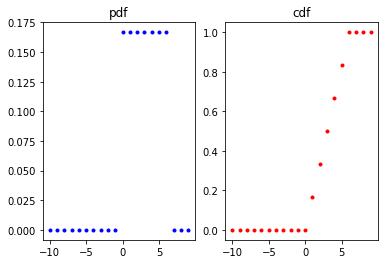

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].plot(xs,pys,"b.",label="pdf")
ax[1].plot(xs,cys,"r.",label="cdf")
ax[0].set_title("pdf")
ax[1].set_title("cdf")
plt.show()

In [19]:
data = np.linspace(0,100,21)
print(data)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


정규분포

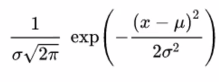

In [21]:
def normal_pdf(x,mu=0,sigma = 1): #확률 이론에서의 정규분포, mu는 기대값(평균), sigma는 표준편차
  pre = 1/(sigma*math.sqrt(2*math.pi))
  post = math.exp(-((x-mu)**2)/(2*(sigma**2)))
  return pre*post

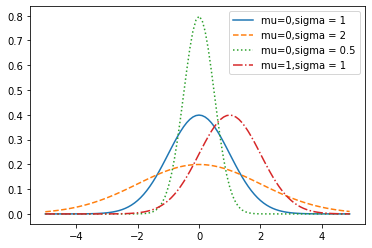

In [25]:
xs = [x/10.0 for x in range(-50,50)] # -5~5 사이를 0.1 step으로
ys1 =[normal_pdf(x) for x in xs]
ys2 =[normal_pdf(x,sigma=2) for x in xs]
ys3 =[normal_pdf(x,sigma=0.5) for x in xs]
ys4 =[normal_pdf(x,mu=1) for x in xs]

plt.plot(xs,ys1,'-',label="mu=0,sigma = 1")
plt.plot(xs,ys2,'--',label="mu=0,sigma = 2")
plt.plot(xs,ys3,':',label="mu=0,sigma = 0.5")
plt.plot(xs,ys4,'-.',label="mu=1,sigma = 1")
plt.legend()
plt.show()

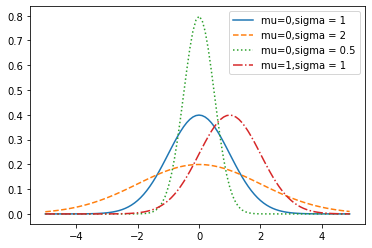

In [27]:
import scipy.stats as st
#평균은 loc,표준편차는 scale
xs = [x/10.0 for x in range(-50,50)] # -5~5 사이를 0.1 step으로
ys1 =[st.norm.pdf(x,scale=1) for x in xs]
ys2 =[st.norm.pdf(x,scale=2) for x in xs]
ys3 =[st.norm.pdf(x,scale=0.5) for x in xs]
ys4 =[st.norm.pdf(x,loc=1) for x in xs]

plt.plot(xs,ys1,'-',label="mu=0,sigma = 1")
plt.plot(xs,ys2,'--',label="mu=0,sigma = 2")
plt.plot(xs,ys3,':',label="mu=0,sigma = 0.5")
plt.plot(xs,ys4,'-.',label="mu=1,sigma = 1")
plt.legend()
plt.show()


정규누적분포

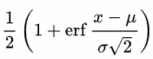

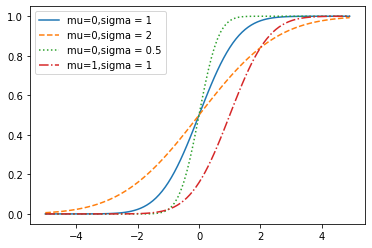

In [29]:
#평균은 loc,표준편차는 scale
xs = [x/10.0 for x in range(-50,50)] # -5~5 사이를 0.1 step으로
ys1 =[st.norm.cdf(x,scale=1) for x in xs]
ys2 =[st.norm.cdf(x,scale=2) for x in xs]
ys3 =[st.norm.cdf(x,scale=0.5) for x in xs]
ys4 =[st.norm.cdf(x,loc=1) for x in xs]

plt.plot(xs,ys1,'-',label="mu=0,sigma = 1")
plt.plot(xs,ys2,'--',label="mu=0,sigma = 2")
plt.plot(xs,ys3,':',label="mu=0,sigma = 0.5")
plt.plot(xs,ys4,'-.',label="mu=1,sigma = 1")
plt.legend()
plt.show()